In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision


In [9]:
#Calculate the image transforms required
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

In [10]:
#Create training set and testing set
trainset = torchvision.datasets.CIFAR10(root = './data',train = True, download =True, transform = transform)
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [11]:
#Create training data loader and testing data loader
batch_size = 64
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=True)


In [12]:
#Model for my simple cnn
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        #First layer
        self.conv1 = nn.Conv2d(3,64, kernel_size=(3,3),stride=1,padding=1)
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(0.3)

        #Second layer
        self.conv2 = nn.Conv2d(64,64,kernel_size=(3,3),stride=1,padding=1)
        self.act2 = nn.ReLU()
        self.drop2 = nn.Dropout(0.3)

        #Third layer
        self.conv3 = nn.Conv2d(64,32,kernel_size=(3,3),stride=1,padding=1)
        self.act3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=(2,2))
        
        #Fourth layer
        self.flat = nn.Flatten()

        #Fifth layer
        self.fc5 = nn.Linear(8192,512)
        self.act5 = nn.ReLU()
        self.drop5 = nn.Dropout(0.5)

        #Sixth layer
        self.fc6 = nn.Linear(512,10)
        #self.sl6 = nn.Softmax(dim=1)

    def forward(self,x):
        x = self.act1(self.conv1(x))
        x = self.drop1(x)

        x = self.act2(self.conv2(x))
        x = self.drop2(x)

        x = self.act3(self.conv3(x))
        x = self.pool3(x)

        x = self.flat(x)
        
        x = self.act5(self.fc5(x))
        x = self.drop5(x)

        x = self.fc6(x)
        return x
    

    





In [13]:
my_model = SimpleCNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(my_model.parameters(),lr=0.001,momentum=0.9)


In [14]:
n_epochs = 50
train_acc = 0
train_count = 0
for epoch in range(n_epochs):
    for inputs,labels in trainloader:
        y_pred = my_model(inputs)
        loss = loss_fn(y_pred,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = 0
    count = 0
    for inputs, labels in testloader:
        y_pred = my_model(inputs)
        acc += (torch.argmax(y_pred,1)==labels).float().sum()
        count+=len(labels)

    acc /= count
    print("Epoch %d: model accuracy %.2f%% " % (epoch,acc*100))

torch.save(my_model.state_dict(),"my_model.pth")

Epoch 0: model accuracy 30.16% 
Epoch 1: model accuracy 37.17% 
Epoch 2: model accuracy 40.62% 
Epoch 3: model accuracy 44.30% 
Epoch 4: model accuracy 44.95% 
Epoch 5: model accuracy 46.97% 
Epoch 6: model accuracy 48.88% 
Epoch 7: model accuracy 49.40% 
Epoch 8: model accuracy 49.35% 
Epoch 9: model accuracy 50.99% 
Epoch 10: model accuracy 52.51% 
Epoch 11: model accuracy 52.28% 
Epoch 12: model accuracy 53.20% 
Epoch 13: model accuracy 53.95% 
Epoch 14: model accuracy 54.04% 
Epoch 15: model accuracy 54.57% 
Epoch 16: model accuracy 55.45% 
Epoch 17: model accuracy 55.24% 
Epoch 18: model accuracy 55.86% 
Epoch 19: model accuracy 55.45% 
Epoch 20: model accuracy 57.22% 
Epoch 21: model accuracy 57.22% 
Epoch 22: model accuracy 57.35% 
Epoch 23: model accuracy 57.64% 
Epoch 24: model accuracy 58.39% 
Epoch 25: model accuracy 57.85% 
Epoch 26: model accuracy 58.89% 
Epoch 27: model accuracy 58.85% 
Epoch 28: model accuracy 58.79% 
Epoch 29: model accuracy 59.69% 
Epoch 30: model accu

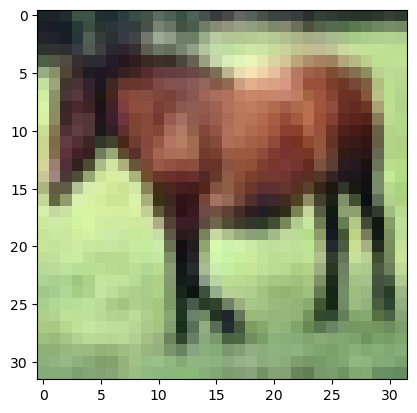

In [15]:
import matplotlib.pyplot as plt
plt.imshow(trainset.data[7])
plt.show()

In [16]:
#Plot the feature maps
X = torch.tensor([trainset.data[7]],dtype=torch.float32).permute(0,3,1,2)
my_model.eval()
with torch.no_grad():
    feature_maps = my_model.conv1(X)

C:\Users\deyko\AppData\Local\Temp\ipykernel_10368\2566960410.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  X = torch.tensor([trainset.data[7]],dtype=torch.float32).permute(0,3,1,2)


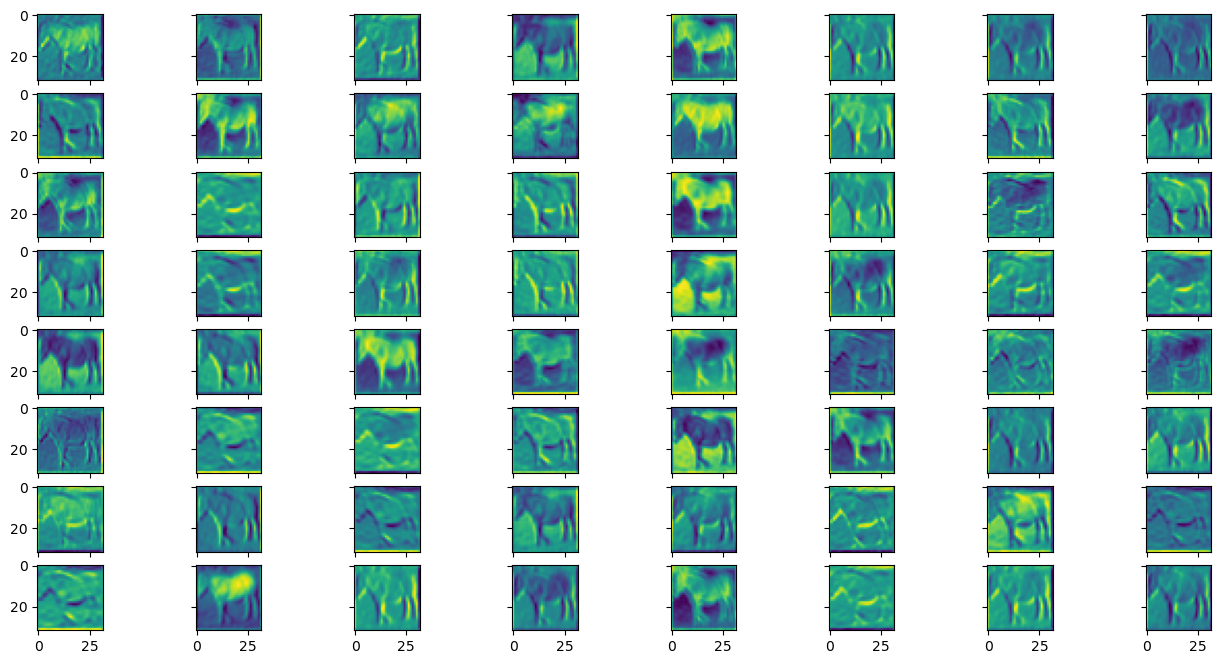

In [18]:
fig, ax = plt.subplots(8,8, sharex=True,sharey=True, figsize=(16,8))
for i in range(0,64):
    row, col = i//8, i%8
    ax[row][col].imshow(feature_maps[0][i])
plt.show()

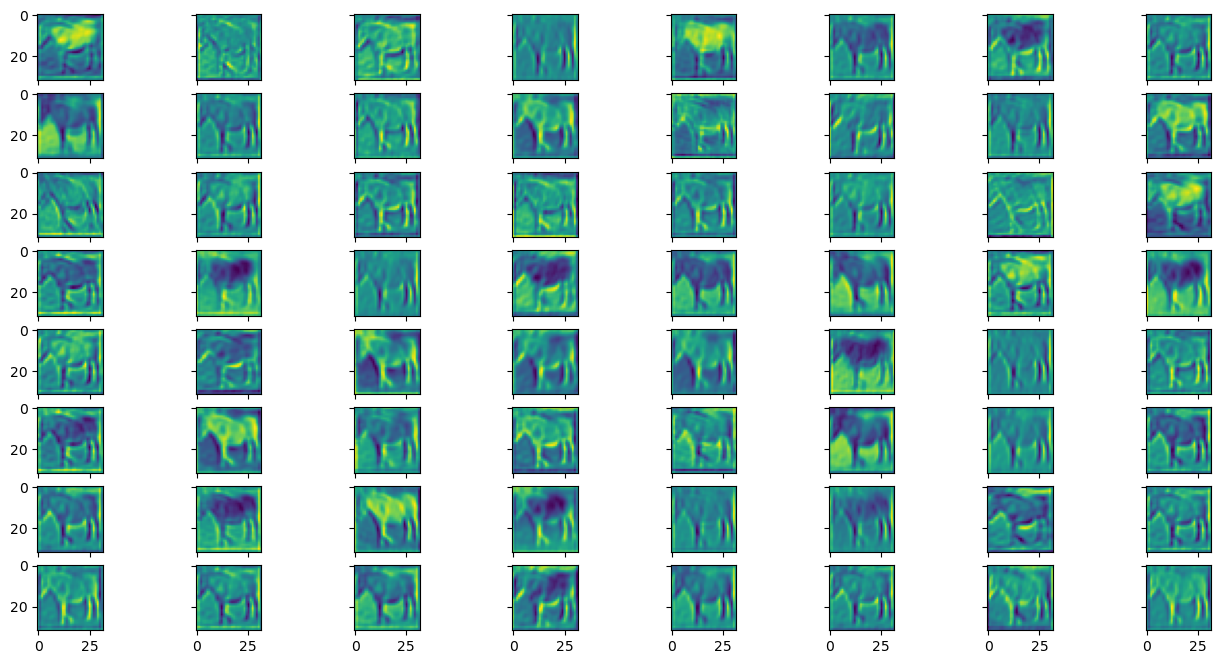

In [20]:
#Plot deeper feature maps
X = torch.tensor([trainset.data[7]],dtype=torch.float32).permute(0,3,1,2)
my_model.eval()
with torch.no_grad():
    feature_maps = my_model.conv1(X)
    feature_maps = my_model.drop1(feature_maps)
    feature_maps = my_model.conv2(feature_maps)

fig, ax = plt.subplots(8,8, sharex=True,sharey=True, figsize=(16,8))
for i in range(0,64):
    row, col = i//8, i%8
    ax[row][col].imshow(feature_maps[0][i])
plt.show()